In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url='https://drive.google.com/file/d/1xKY4nnik_Fon4D6eBdJ7TCzDTlzKWPyJ/view?usp=sharing'
url_='https://drive.google.com/uc?id=' + url.split('/')[-2]

data = pd.read_csv(url_, sep=';')

data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [2]:
data.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [3]:
data.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [4]:
data = data.drop([
    'cap-surface',
    'does-bruise-or-bleed',
    'gill-spacing',
    'spore-print-color',
    'habitat', 
    'spore-print-color',
    'veil-color',
    'veil-type' ,
    'stem-surface', 
    'stem-root'], axis = 1)
data.head()

,class,cap-diameter,cap-shape,cap-color,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,season
0,p,15.26,x,o,e,w,16.95,17.09,w,t,g,w
1,p,16.60,x,o,e,w,17.99,18.19,w,t,g,u
2,p,14.07,x,o,e,w,17.80,17.74,w,t,g,w
3,p,14.17,f,e,e,w,15.77,15.98,w,t,p,w
4,p,14.64,x,o,e,w,16.53,17.20,w,t,p,w


In [5]:
data.isna().sum()

class                 0
cap-diameter          0
cap-shape             0
cap-color             0
gill-attachment    9884
gill-color            0
stem-height           0
stem-width            0
stem-color            0
has-ring              0
ring-type          2471
season                0
dtype: int64

In [6]:
data.shape

(61069, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            61069 non-null  object 
 1   cap-diameter     61069 non-null  float64
 2   cap-shape        61069 non-null  object 
 3   cap-color        61069 non-null  object 
 4   gill-attachment  51185 non-null  object 
 5   gill-color       61069 non-null  object 
 6   stem-height      61069 non-null  float64
 7   stem-width       61069 non-null  float64
 8   stem-color       61069 non-null  object 
 9   has-ring         61069 non-null  object 
 10  ring-type        58598 non-null  object 
 11  season           61069 non-null  object 
dtypes: float64(3), object(9)
memory usage: 5.6+ MB


In [8]:
for col in data.columns:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)
data.isna().sum()

class              0
cap-diameter       0
cap-shape          0
cap-color          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
has-ring           0
ring-type          0
season             0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])
data.head()

,class,cap-diameter,cap-shape,cap-color,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,season
0,1,15.26,6,6,2,10,16.95,17.09,11,1,2,3
1,1,16.60,6,6,2,10,17.99,18.19,11,1,2,2
2,1,14.07,6,6,2,10,17.80,17.74,11,1,2,3
3,1,14.17,2,1,2,10,15.77,15.98,11,1,5,3
4,1,14.64,6,6,2,10,16.53,17.20,11,1,5,3


Data visualisation

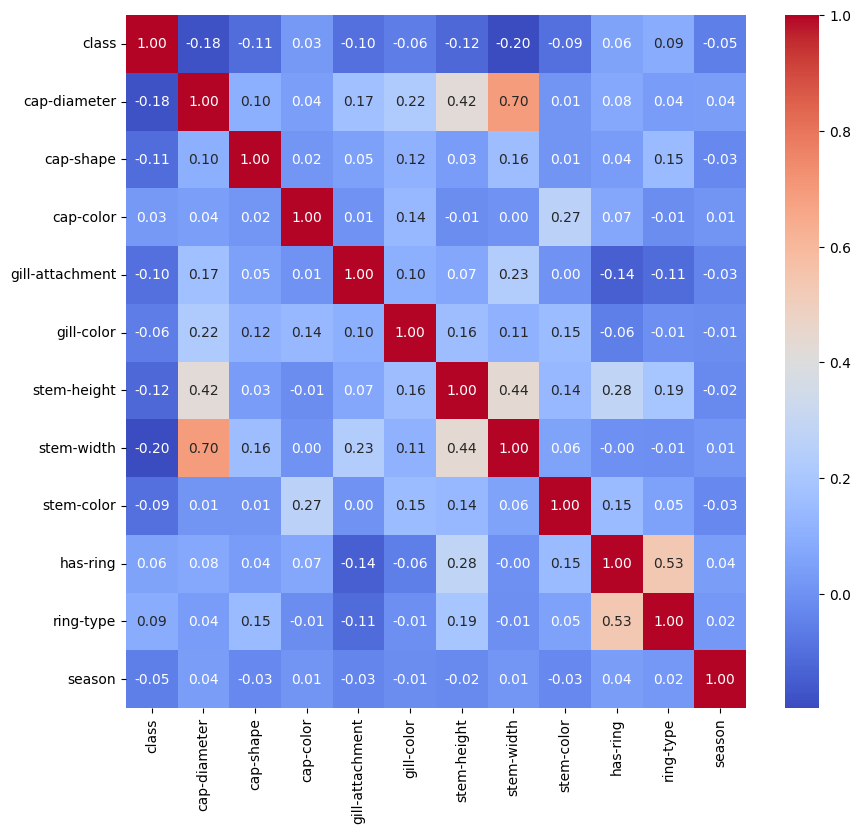

In [10]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

In [11]:
X = data.drop('class', axis=1)
y = data['class']
X.columns

Index(['cap-diameter', 'cap-shape', 'cap-color', 'gill-attachment',
       'gill-color', 'stem-height', 'stem-width', 'stem-color', 'has-ring',
       'ring-type', 'season'],
      dtype='object')

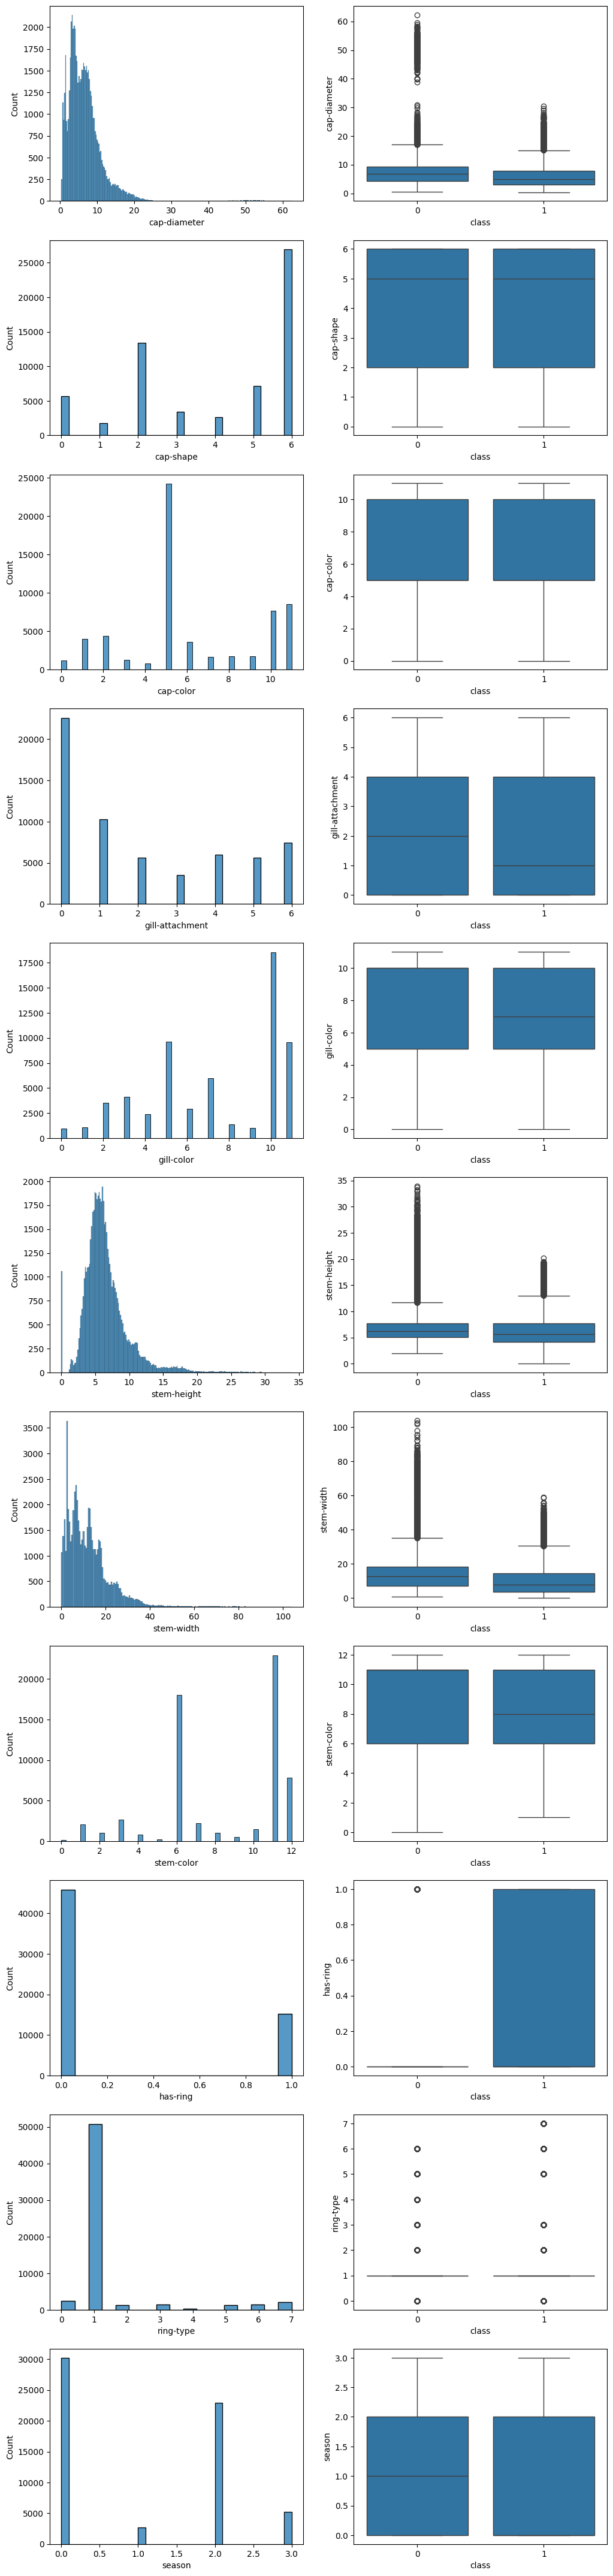

In [12]:
num_features = len(X.columns)
fig, axs = plt.subplots(num_features, 2, figsize=(12, num_features * 5))
for i, column in enumerate(X.columns):    
    sns.histplot(X[column], ax=axs[i, 0])
    sns.boxplot(x=y, y=X[column], ax=axs[i, 1])

Training Models

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (48855, 11), y_train shape: (48855,)
X_test shape: (12214, 11), y_test shape: (12214,)


In [14]:
scaler = StandardScaler()
#scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (48855, 11), y_train shape: (48855,)
X_test shape: (12214, 11), y_test shape: (12214,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [16]:
dict_models={
    'kNN':KNeighborsClassifier(n_neighbors=5),
    'SVM':SVC(random_state=42),
    'Random Forest':RandomForestClassifier(random_state=42),
    'Adaboost':AdaBoostClassifier(random_state=42),
    'Decision Tree':DecisionTreeClassifier(random_state=42)
}

In [17]:
models_train=[]
accuracy_train=[]
accuracy_test=[]

In [18]:
for model_name, model in dict_models.items():
    model.fit(X_train_scaled,y_train)
    pred=model.predict(X_test_scaled)

    print(model_name, '\n')
    print('Confusion matrix','\n',confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print(accuracy_score(y_test, pred),'\n')

kNN 

Confusion matrix 
 [[5338   36]
 [  26 6814]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5374
           1       0.99      1.00      1.00      6840

    accuracy                           0.99     12214
   macro avg       0.99      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214

0.9949238578680203 

SVM 

Confusion matrix 
 [[4977  397]
 [ 427 6413]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      5374
           1       0.94      0.94      0.94      6840

    accuracy                           0.93     12214
   macro avg       0.93      0.93      0.93     12214
weighted avg       0.93      0.93      0.93     12214

0.932536433600786 

Random Forest 

Confusion matrix 
 [[5353   21]
 [  10 6830]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1

kNN error rate depending on K value visualisation

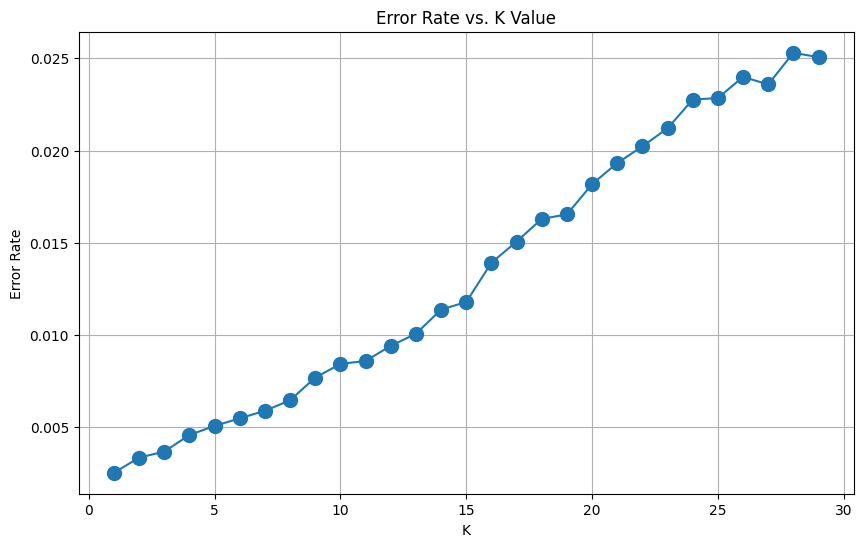

In [19]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

Decision tree visualisation

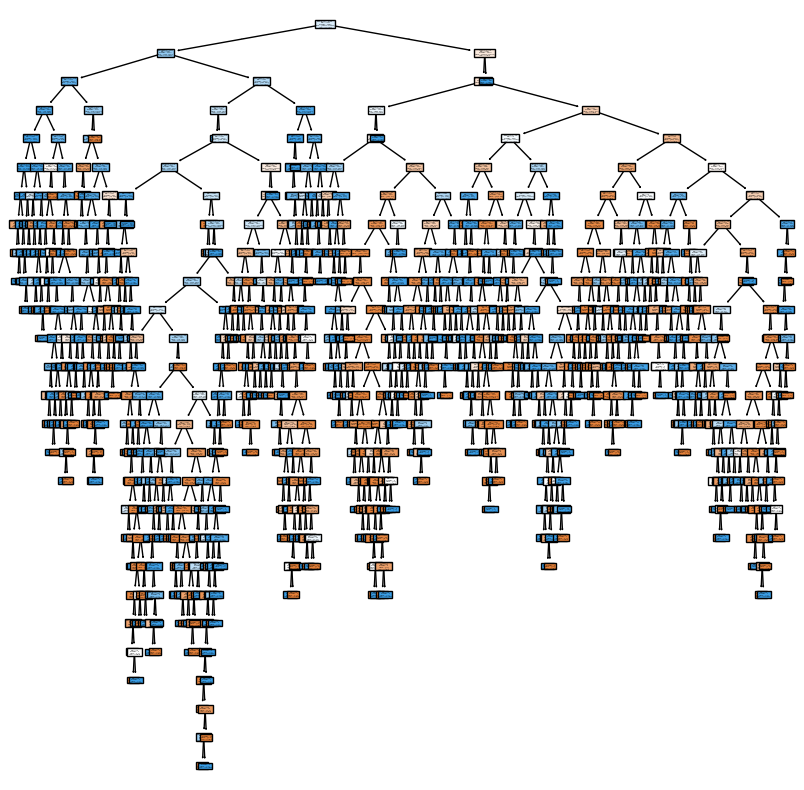

In [20]:
plt.figure(figsize = (10, 10))
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train,y_train)
plot_tree(decision_tree, feature_names =X.columns, class_names = ['Eatable', 'Poisonous'], filled = True)
plt.show()

Gridsearch for SVM

In [21]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [22]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [23]:
grid.best_estimator_

SVC(C=100, gamma=1)